In [184]:
file = 'data/structral/sample/train.in'

In [185]:
import tools

In [186]:
N=0

In [187]:
train_set, nodes, poss_set, neg_set = tools.sample_structural(file, N)

In [188]:
from graph_tool.all import *
g = Graph(directed=False)
g.add_vertex(max(nodes) + 1)

<generator object <genexpr> at 0x7f70981a3e10>

In [189]:
for edge in train_set:
    if edge not in poss_set:
        u, w = map(int, edge.split())
        g.add_edge(g.vertex(u), g.vertex(w))

In [190]:
pos = sfdp_layout(g)

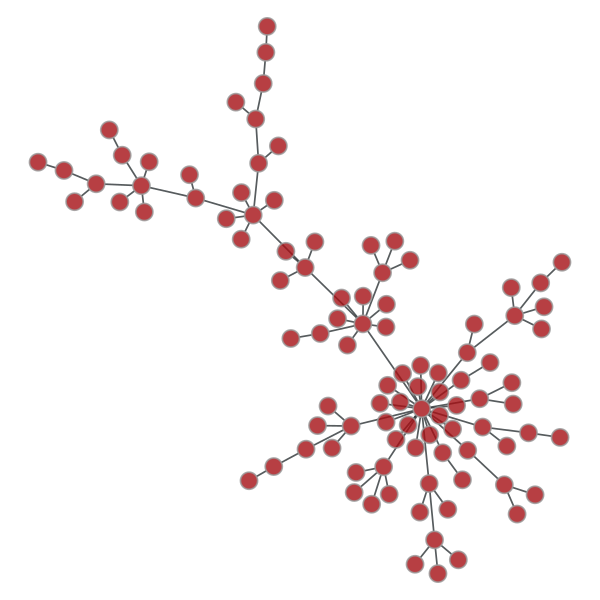

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f70940456d0, at 0x7f70940452d0>

In [191]:
%matplotlib inline

graph_draw(g, pos=pos)

In [192]:
! python ../node2vec/src/main.py --input data/structral/sample/train.in --output /home/ubuntu/work/output.txt

Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10


In [193]:
! cat /home/ubuntu/work/output.txt

100 128
1 -0.445714 -0.460763 0.087716 -0.005258 0.438055 -0.044267 -0.027831 0.140838 0.073470 -0.176411 0.141197 0.286208 -0.232436 0.019964 0.004298 -0.094622 0.370996 -0.080676 0.108046 -0.059186 0.203699 0.025637 0.008685 0.283002 0.305406 0.058675 -0.387722 0.037846 -0.252583 -0.025838 -0.311604 -0.049615 -0.204340 0.053324 -0.095992 -0.244587 0.223586 0.055705 -0.019835 0.010513 -0.287595 0.001155 0.238707 0.111083 -0.217497 0.066569 0.017796 -0.070268 0.046783 -0.005828 -0.063357 0.117369 0.071302 0.008845 -0.210610 -0.085573 0.026828 -0.041902 -0.232416 -0.011066 0.085693 -0.144587 -0.119172 0.202233 -0.150456 0.078342 0.030550 0.130721 -0.051602 -0.125975 0.173290 -0.020794 0.186397 -0.015228 0.286553 -0.232403 0.128623 -0.122891 0.010054 -0.033213 0.151659 -0.153938 -0.208894 -0.164201 0.030644 0.072114 -0.031536 -0.012310 0.104315 0.073319 0.064451 0.065519 -0.049494 -0.004951 -0.173207 0.106251 -0.102070 -0.275542 0.160157 0.015431 -0.241396 -0.197149 0.009656 0.096947 0.1

In [194]:
w2v = []
fin =  open('/home/ubuntu/work/output.txt')
fin.readline()
for line in fin:
    line = line.strip().split()
    w2v.append(line[1:])

In [195]:
w2v

[['-0.445714',
  '-0.460763',
  '0.087716',
  '-0.005258',
  '0.438055',
  '-0.044267',
  '-0.027831',
  '0.140838',
  '0.073470',
  '-0.176411',
  '0.141197',
  '0.286208',
  '-0.232436',
  '0.019964',
  '0.004298',
  '-0.094622',
  '0.370996',
  '-0.080676',
  '0.108046',
  '-0.059186',
  '0.203699',
  '0.025637',
  '0.008685',
  '0.283002',
  '0.305406',
  '0.058675',
  '-0.387722',
  '0.037846',
  '-0.252583',
  '-0.025838',
  '-0.311604',
  '-0.049615',
  '-0.204340',
  '0.053324',
  '-0.095992',
  '-0.244587',
  '0.223586',
  '0.055705',
  '-0.019835',
  '0.010513',
  '-0.287595',
  '0.001155',
  '0.238707',
  '0.111083',
  '-0.217497',
  '0.066569',
  '0.017796',
  '-0.070268',
  '0.046783',
  '-0.005828',
  '-0.063357',
  '0.117369',
  '0.071302',
  '0.008845',
  '-0.210610',
  '-0.085573',
  '0.026828',
  '-0.041902',
  '-0.232416',
  '-0.011066',
  '0.085693',
  '-0.144587',
  '-0.119172',
  '0.202233',
  '-0.150456',
  '0.078342',
  '0.030550',
  '0.130721',
  '-0.051602',
 

In [198]:
s = g.new_vertex_property("vector<double>")

In [199]:
for node in nodes:
    s[g.vertex(node)] = model.embedding_[node]

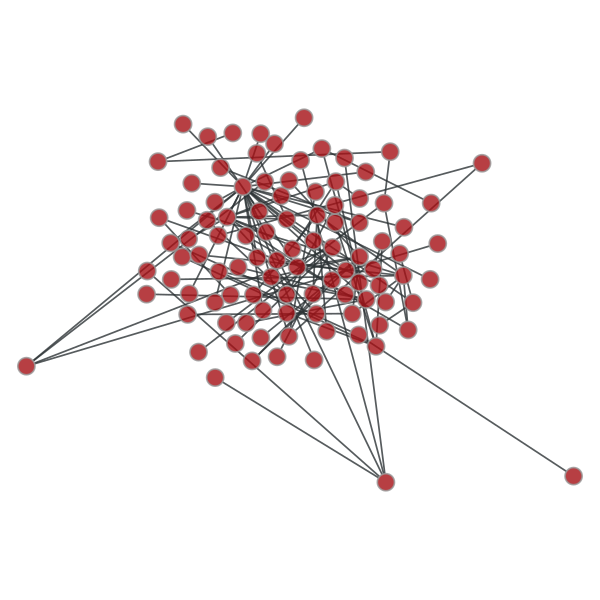

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f70940456d0, at 0x7f70940458d0>

In [200]:
%matplotlib inline

graph_draw(g, pos=s)

In [175]:
import numpy as np

for e in g.edges():
    print int(e.source()), int(e.target()), np.dot(np.array(s[e.source()]), np.array(s[e.target()])) #, np.array(s[e.source()]) * np.array(s[e.target()])

1 8 1.44324860774
1 9 1.08708435434
1 2 1.2975455137
1 3 1.33964095568
1 0 1.20618882117
1 6 1.28721410985
1 7 1.36030057449
1 4 1.33688560121
1 5 1.28325687439


In [197]:
from sklearn.manifold import TSNE

model = TSNE()
model.fit(w2v)
model.embedding_

array([[  2.15460693e+01,  -7.43595677e+01],
       [ -3.36653776e+01,  -4.77019119e+01],
       [  5.94515929e+01,   6.39848299e+01],
       [  6.63481295e+01,   1.59068161e+02],
       [  8.53029751e+01,   3.34445189e+01],
       [ -1.85175488e+02,   7.78835207e+01],
       [  1.61355727e+01,   7.34963139e+01],
       [ -2.95785815e+00,   4.07568085e+01],
       [ -4.46844081e+01,  -2.64027297e+01],
       [  1.82948740e+01,  -2.77732994e+01],
       [ -5.33035998e+01,  -3.68502272e+01],
       [  6.38130978e+01,  -9.44949597e+00],
       [ -7.16784590e+01,  -1.11878617e+01],
       [  7.85611878e+01,   1.44915666e+01],
       [  2.89755635e+01,  -5.17270944e+00],
       [ -8.38412611e+01,   1.71929098e+01],
       [  4.28009399e+01,   4.10955559e+01],
       [  5.26446726e+01,   3.12101545e+01],
       [ -2.12452680e+01,  -8.47815949e+01],
       [  8.19336715e+01,   5.25185800e+01],
       [ -1.50326394e+00,   5.69667035e+01],
       [  6.50541744e+01,  -3.61659971e+01],
       [  

In [155]:
pos[g.vertex(0)]

array([-6.73461733,  6.5233853 ])

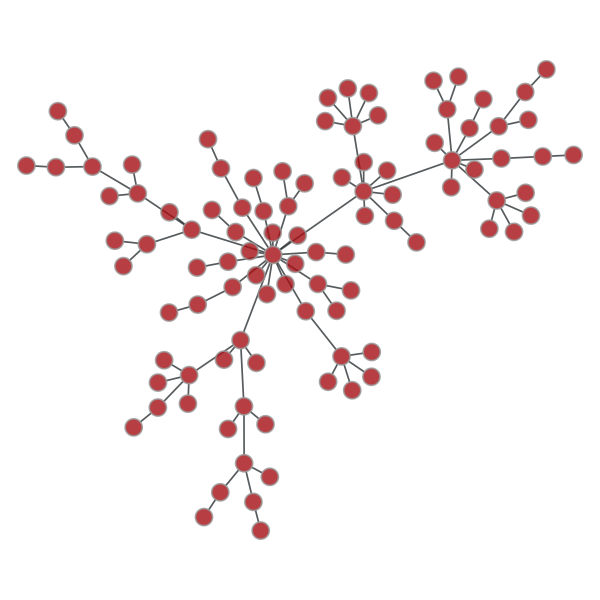

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for a non-existent graph, at 0x7f7097f07290>

In [156]:
graph_draw(price_network(100, directed=False))

In [182]:
g = price_network(100, directed=False)
fout = open('data/structral/sample/train.in', 'w')
for e in g.edges():
    fout.write(str(e.source()) + ' ' + str(e.target()) + '\n')
fout.close()

In [183]:
!cat data/structral/sample/train.in

1 0
2 0
3 1
4 1
5 1
6 1
7 2
8 1
9 8
10 1
11 2
12 8
13 9
14 5
15 13
16 13
17 1
18 1
19 13
20 1
21 19
22 4
23 1
24 20
25 16
26 8
27 23
28 25
29 1
30 21
31 30
32 8
33 1
34 28
35 5
36 16
37 20
38 2
39 2
40 3
41 1
42 1
43 34
44 25
45 4
46 1
47 13
48 13
49 17
50 17
51 8
52 8
53 9
54 19
55 1
56 14
57 25
58 21
59 1
60 31
61 14
62 27
63 13
64 52
65 14
66 25
67 1
68 1
69 27
70 25
71 28
72 50
73 17
74 1
75 5
76 1
77 3
78 24
79 8
80 8
81 9
82 52
83 0
84 9
85 1
86 3
87 1
88 1
89 3
90 52
91 32
92 11
93 17
94 1
95 57
96 72
97 29
98 8
99 67
